### Classifying movie reviews - Part 1

### Load the IMDB Dataset

In [1]:
from keras.datasets import imdb

/usr/local/anaconda/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Only keep the top 10,000 most frequently occurring words in the training data. (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

### Prepare the data

In [3]:
from __future__ import print_function
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer

#define parameters
max_words = 10000
batch_size = 32
nb_epoch = 5

In [4]:
print(len(X_train), 'train sequences')


25000 train sequences


In [5]:
print(len(X_test), 'test sequences')
#Number of classes


25000 test sequences


In [6]:
nb_classes = np.max(y_train)+1
print(nb_classes, 'classes')

2 classes


### Vectorization of data

In [7]:
#Vectorize the data
print('Vectorizing sequence data...')
tokenizer = Tokenizer(nb_words=max_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Vectorizing sequence data...


/usr/local/anaconda/python3/lib/python3.6/site-packages/keras/preprocessing/text.py:172: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


X_train shape: (25000, 10000)
X_test shape: (25000, 10000)


In [8]:
print(X_train[1])

[0. 1. 1. ... 0. 0. 0.]


In [9]:
print('Convert class vector to binary class matrix (for use with categorical_crossentropy)')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
Y_train shape: (25000, 2)
Y_test shape: (25000, 2)


### Building model with below parameters:
#### Activation funtion - relu (First Stage)
#### Activation funtion - softmax (Second Stage)
#### Loss funtion - categorical_crossentropy
#### Epoch size - 5
#### Batch_size - 32
#### Accuracy -  """""" 53.23%""""""

In [10]:
#Build the model
print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              )
#Fit the model with the training data
history = model.fit(X_train, Y_train,
                    nb_epoch=nb_epoch, batch_size=batch_size,
                    verbose=1, validation_split=0.1)
#evaluate the model
score = model.evaluate(X_test, Y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score)
print('Test accuracy:', score)

Building model...


/usr/local/anaconda/python3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 23s 1ms/step - loss: 0.3294 - val_loss: 0.2819
Epoch 2/5
22500/22500 [==============================] - 23s 1ms/step - loss: 0.1773 - val_loss: 0.3346
Epoch 3/5
22500/22500 [==============================] - 23s 1ms/step - loss: 0.0976 - val_loss: 0.3440
Epoch 4/5
22500/22500 [==============================] - 23s 1ms/step - loss: 0.0426 - val_loss: 0.4106
Epoch 5/5
25000/25000 [==============================] - 3s 112us/step
Test score: 0.515432866859436
Test accuracy: 0.515432866859436


In [11]:
#define parameters
max_words = 10000
batch_size = 100
nb_epoch = 10

### Building model with below parameters (Changing few of them):
#### Activation funtion - relu (First Stage)
#### Activation funtion - softmax (Second Stage)
#### Loss funtion - categorical_crossentropy
#### Epoch size - 10
#### Batch_size - 100
#### Accuracy -  """""" 61.54%""""""

In [12]:
#Build the model
print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              )
#Fit the model with the training data
history = model.fit(X_train, Y_train,
                    nb_epoch=nb_epoch, batch_size=batch_size,
                    verbose=1, validation_split=0.1)
#evaluate the model
score = model.evaluate(X_test, Y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score)
print('Test accuracy:', score)

Building model...


/usr/local/anaconda/python3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 9s 397us/step - loss: 0.3274 - val_loss: 0.2722
Epoch 2/10
22500/22500 [==============================] - 9s 386us/step - loss: 0.1716 - val_loss: 0.2919
Epoch 3/10
22500/22500 [==============================] - 9s 385us/step - loss: 0.0955 - val_loss: 0.3320
Epoch 4/10
22500/22500 [==============================] - 9s 386us/step - loss: 0.0423 - val_loss: 0.4080
Epoch 5/10
22500/22500 [==============================] - 9s 387us/step - loss: 0.0172 - val_loss: 0.4573
Epoch 6/10
22500/22500 [==============================] - 9s 387us/step - loss: 0.0082 - val_loss: 0.4941
Epoch 7/10
22500/22500 [==============================] - 9s 385us/step - loss: 0.0039 - val_loss: 0.5429
Epoch 8/10
22500/22500 [==============================] - 9s 385us/step - loss: 0.0030 - val_loss: 0.5722
Epoch 9/10
22500/22500 [==============================] - 9s 386us/step - loss: 0.0018 - val_loss: 0.59

### Building model with below parameters (Changing few of them):
#### Activation funtion - relu (First Stage)
#### Activation funtion - softmax (Second Stage)
#### Loss funtion - binary_crossentropy
#### Epoch size - 20
#### Batch_size - 100
#### Accuracy -  """""" 86.88%""""""

In [13]:
# Extending the first model with activation functions
model = Sequential()
#specifying activation functions
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, Y_train, nb_epoch=20, batch_size=batch_size,  verbose=1, validation_split=0.1)
# evaluate the model
scores = model.evaluate(X_test, Y_test,batch_size=batch_size, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/anaconda/python3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 9s 414us/step - loss: 0.3280 - acc: 0.8592 - val_loss: 0.2711 - val_acc: 0.8904
Epoch 2/20
22500/22500 [==============================] - 9s 388us/step - loss: 0.1698 - acc: 0.9346 - val_loss: 0.3082 - val_acc: 0.8848
Epoch 3/20
22500/22500 [==============================] - 9s 387us/step - loss: 0.0936 - acc: 0.9676 - val_loss: 0.3403 - val_acc: 0.8832
Epoch 4/20
22500/22500 [==============================] - 9s 389us/step - loss: 0.0442 - acc: 0.9872 - val_loss: 0.3998 - val_acc: 0.8812
Epoch 5/20
22500/22500 [==============================] - 9s 389us/step - loss: 0.0183 - acc: 0.9967 - val_loss: 0.4491 - val_acc: 0.8876
Epoch 6/20
22500/22500 [==============================] - 9s 387us/step - loss: 0.0076 - acc: 0.9994 - val_loss: 0.5029 - val_acc: 0.8824
Epoch 7/20
22500/22500 [==============================] - 9s 387us/step - loss: 0.0035 - acc: 0.9998 - val_loss: 0.5482 - v

### Observation from above:: Epoch after 10 seems to be overfitting

### Building model with below parameters (Changing few of them):
#### Activation funtion - relu (First Stage)
#### Activation funtion - softmax (Second Stage)
#### Loss funtion - binary_crossentropy
#### Epoch size - 10
#### Batch_size - 100
#### Accuracy -  """""" 86.91%""""""

In [14]:
# Extending the first model with activation functions
model = Sequential()
#specifying activation functions
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size,  verbose=1, validation_split=0.1)
# evaluate the model
scores = model.evaluate(X_test, Y_test,batch_size=batch_size, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/anaconda/python3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 9s 405us/step - loss: 0.3291 - acc: 0.8598 - val_loss: 0.2811 - val_acc: 0.8860
Epoch 2/10
22500/22500 [==============================] - 9s 388us/step - loss: 0.1675 - acc: 0.9355 - val_loss: 0.2909 - val_acc: 0.8856
Epoch 3/10
22500/22500 [==============================] - 9s 387us/step - loss: 0.0944 - acc: 0.9679 - val_loss: 0.3424 - val_acc: 0.8856
Epoch 4/10
22500/22500 [==============================] - 9s 387us/step - loss: 0.0421 - acc: 0.9892 - val_loss: 0.3878 - val_acc: 0.8812
Epoch 5/10
22500/22500 [==============================] - 9s 388us/step - loss: 0.0179 - acc: 0.9966 - val_loss: 0.4699 - val_acc: 0.8820
Epoch 6/10
22500/22500 [==============================] - 9s 387us/step - loss: 0.0074 - acc: 0.9990 - val_loss: 0.5107 - val_acc: 0.8812
Epoch 7/10
22500/22500 [==============================] - 9s 388us/step - loss: 0.0040 - acc: 0.9998 - val_loss: 0.5390 - v

### 1. Model used two dense layers.
### 2. Activation function "relu" in one layer and "softmax" in the other
### 3. Hidden unit - Loss function :: Tried "categorical_crossentropy" and "binary_crossentropy"

## Classifying movie reviews - Part 2

### '''Trains an LSTM model on the IMDB sentiment classification task. -> Model A

** Optimizer :: adam  **                                                                                                       
** Activation Function :: Sigmoid **
* Test accuracy: 0.82548


In [24]:
from __future__ import print_function
from __future__ import absolute_import
import numpy as np
np.random.seed(1337)  # for reproducibility

In [42]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.layers import Dense, Dropout, Activation

In [114]:
max_features = 10000  # vocabulary size
maxlen = 100  # maximum length of the review
batch_size = 32
embedding_dims = 20
ngram_filters = [3, 5, 7]
nb_filter = 1200  # number of filters for each ngram_filter
nb_epoch = 5

In [115]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=max_features,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [116]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


In [117]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)


In [27]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 101s 4ms/step - loss: 0.4594 - acc: 0.7824 - val_loss: 0.3814 - val_acc: 0.8333
Epoch 2/15
25000/25000 [==============================] - 101s 4ms/step - loss: 0.3314 - acc: 0.8607 - val_loss: 0.3730 - val_acc: 0.8335
Epoch 3/15
25000/25000 [==============================] - 101s 4ms/step - loss: 0.2659 - acc: 0.8925 - val_loss: 0.3788 - val_acc: 0.8419
Epoch 4/15
25000/25000 [==============================] - 101s 4ms/step - loss: 0.2088 - acc: 0.9172 - val_loss: 0.3899 - val_acc: 0.8388
Epoch 5/15
25000/25000 [==============================] - 101s 4ms/step - loss: 0.1646 - acc: 0.9378 - val_loss: 0.4428 - val_acc: 0.8318
Epoch 6/15
25000/25000 [==============================] - 101s 4ms/step - loss: 0.1289 - acc: 0.9526 - val_loss: 0.5468 - val_acc: 0.8395
Epoch 7/15
25000/25000 [==============================] - 101s 4ms/step - loss: 0.1043 - acc: 0.9625 - val_loss: 

In [33]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.890866581236124
Test accuracy: 0.82548


### '''Trains a Bidirectional LSTM on the IMDB sentiment classification task. -> Model B

### Testing accuracy on various optimizers with Bidirectional LSTM

** Adadelta ** Test accuracy: 0.79672

In [26]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [37]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [38]:
model.compile('Adadelta', 'binary_crossentropy', metrics=['accuracy'])

In [40]:
print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 90s 4ms/step - loss: 0.6069 - acc: 0.7207 - val_loss: 1.6669 - val_acc: 0.5370
Epoch 2/4
25000/25000 [==============================] - 89s 4ms/step - loss: 0.4809 - acc: 0.8053 - val_loss: 0.4217 - val_acc: 0.8292
Epoch 3/4
25000/25000 [==============================] - 91s 4ms/step - loss: 0.4814 - acc: 0.7902 - val_loss: 0.6171 - val_acc: 0.7465
Epoch 4/4
25000/25000 [==============================] - 90s 4ms/step - loss: 0.4278 - acc: 0.7940 - val_loss: 0.5931 - val_acc: 0.7967


In [41]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

25000/25000 [==============================] - 14s 554us/step


In [42]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.5931240715789795
Test accuracy: 0.79672


** Optimizer :: SGD  **                                                                                                       
** Activation Function :: Sigmoid **
* Test accuracy: 0.54444


In [44]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('SGD', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 85s 3ms/step - loss: 0.6930 - acc: 0.5085 - val_loss: 0.6927 - val_acc: 0.5272
Epoch 2/4
25000/25000 [==============================] - 84s 3ms/step - loss: 0.6926 - acc: 0.5186 - val_loss: 0.6924 - val_acc: 0.5214
Epoch 3/4
25000/25000 [==============================] - 84s 3ms/step - loss: 0.6921 - acc: 0.5285 - val_loss: 0.6922 - val_acc: 0.5129
Epoch 4/4
25000/25000 [==============================] - 84s 3ms/step - loss: 0.6919 - acc: 0.5306 - val_loss: 0.6918 - val_acc: 0.5444


In [45]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

25000/25000 [==============================] - 13s 539us/step


In [46]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.6918430708122253
Test accuracy: 0.54444


** Optimizer :: RMSprop  **                                                                                                     
** Activation Function :: relu **
* Test accuracy: 0.7098

In [47]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

# try using different optimizers and different optimizer configs
model.compile('RMSprop', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 90s 4ms/step - loss: 0.6739 - acc: 0.7157 - val_loss: 0.5186 - val_acc: 0.7859
Epoch 2/4
25000/25000 [==============================] - 88s 4ms/step - loss: 0.5990 - acc: 0.7330 - val_loss: 0.5479 - val_acc: 0.7154
Epoch 3/4
25000/25000 [==============================] - 88s 4ms/step - loss: 0.5092 - acc: 0.7506 - val_loss: 0.6176 - val_acc: 0.7433
Epoch 4/4
25000/25000 [==============================] - 89s 4ms/step - loss: 0.4976 - acc: 0.7277 - val_loss: 2.0009 - val_acc: 0.7098


In [48]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

25000/25000 [==============================] - 14s 541us/step


In [49]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 2.0009261404418943
Test accuracy: 0.7098


** Optimizer :: SGD  **                                                                                                     
** Activation Function :: relu **
* Test accuracy: 0.57212

In [50]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

# try using different optimizers and different optimizer configs
model.compile('SGD', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 86s 3ms/step - loss: 0.7200 - acc: 0.5134 - val_loss: 0.6923 - val_acc: 0.5149
Epoch 2/4
25000/25000 [==============================] - 84s 3ms/step - loss: 0.6921 - acc: 0.5228 - val_loss: 0.6909 - val_acc: 0.5140
Epoch 3/4
25000/25000 [==============================] - 84s 3ms/step - loss: 0.6896 - acc: 0.5309 - val_loss: 0.6870 - val_acc: 0.5650
Epoch 4/4
25000/25000 [==============================] - 84s 3ms/step - loss: 0.6865 - acc: 0.5452 - val_loss: 0.6844 - val_acc: 0.5721


In [51]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

25000/25000 [==============================] - 14s 543us/step


In [52]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.6843665870285034
Test accuracy: 0.57212


** Optimizer :: Adagrad  **                                                                                                     
** Activation Function :: relu **
* Test accuracy: 0.71636

In [53]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

# try using different optimizers and different optimizer configs
model.compile('Adagrad', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 88s 4ms/step - loss: 0.6444 - acc: 0.7292 - val_loss: 0.4783 - val_acc: 0.7928
Epoch 2/4
25000/25000 [==============================] - 86s 3ms/step - loss: 0.5247 - acc: 0.7363 - val_loss: 0.5088 - val_acc: 0.7707
Epoch 3/4
25000/25000 [==============================] - 86s 3ms/step - loss: 0.4095 - acc: 0.7996 - val_loss: 0.4991 - val_acc: 0.7729
Epoch 4/4
25000/25000 [==============================] - 87s 3ms/step - loss: 0.4053 - acc: 0.7893 - val_loss: 0.5698 - val_acc: 0.7164


In [54]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

25000/25000 [==============================] - 14s 541us/step


In [55]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.5697923965454101
Test accuracy: 0.71636


** Optimizer :: Adamax  **                                                                                                     
** Activation Function :: relu **
* Test accuracy: 0.75692

In [56]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

# try using different optimizers and different optimizer configs
model.compile('Adamax', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 89s 4ms/step - loss: 0.5763 - acc: 0.7009 - val_loss: 0.4671 - val_acc: 0.7398
Epoch 2/4
25000/25000 [==============================] - 88s 4ms/step - loss: 0.4232 - acc: 0.7668 - val_loss: 0.4689 - val_acc: 0.7756
Epoch 3/4
25000/25000 [==============================] - 89s 4ms/step - loss: 0.3765 - acc: 0.7675 - val_loss: 0.4229 - val_acc: 0.8231
Epoch 4/4
25000/25000 [==============================] - 89s 4ms/step - loss: 0.3412 - acc: 0.7854 - val_loss: 0.4675 - val_acc: 0.7569


In [58]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

25000/25000 [==============================] - 14s 563us/step


In [59]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.4674739478683472
Test accuracy: 0.75692


** Optimizer :: Adam  **                                                                                                     
** Activation Function :: relu **
* Test accuracy: 0.76236

In [118]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

# try using different optimizers and different optimizer configs
model.compile('Adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 91s 4ms/step - loss: 0.6501 - acc: 0.6705 - val_loss: 0.5419 - val_acc: 0.7196
Epoch 2/4
25000/25000 [==============================] - 89s 4ms/step - loss: 0.4962 - acc: 0.7723 - val_loss: 0.5122 - val_acc: 0.7942
Epoch 3/4
25000/25000 [==============================] - 89s 4ms/step - loss: 0.4127 - acc: 0.8102 - val_loss: 0.5487 - val_acc: 0.7950
Epoch 4/4
25000/25000 [==============================] - 89s 4ms/step - loss: 0.2889 - acc: 0.7987 - val_loss: 0.7312 - val_acc: 0.7624


In [119]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

25000/25000 [==============================] - 14s 545us/step


In [120]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.7311688458299637
Test accuracy: 0.76236


### "Relu" and "Adam" seem to give better accuracy(0.76236) but at the same time loss function (0.73116) has increased considerably which in contrary should be low.

### "Relu" and "Adamax" is performing good on accuracy(0.75692) as well as loss function (0.467473)

### Using Optimizer "Adamax" in the subsequent models

### '''Demonstrating the use of Convolution1D for text classification. -> Model C

### Test accuracy: 0.89632
### Test score: 0.2561

In [100]:
# set parameters:
max_features = 10000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 4

In [101]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=max_features,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [102]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


In [103]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (25000, 400)
X_test shape: (25000, 400)


In [104]:
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

In [105]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

Build model...


In [106]:
# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

In [107]:
# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

In [108]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [109]:
model.compile(loss='binary_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

In [110]:
history1 = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 83s 3ms/step - loss: 0.4694 - acc: 0.7574 - val_loss: 0.3755 - val_acc: 0.8310
Epoch 2/4
25000/25000 [==============================] - 85s 3ms/step - loss: 0.2876 - acc: 0.8787 - val_loss: 0.2665 - val_acc: 0.8879
Epoch 3/4
25000/25000 [==============================] - 83s 3ms/step - loss: 0.2199 - acc: 0.9124 - val_loss: 0.2499 - val_acc: 0.8971
Epoch 4/4
25000/25000 [==============================] - 82s 3ms/step - loss: 0.1748 - acc: 0.9348 - val_loss: 0.2562 - val_acc: 0.8963


In [111]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

25000/25000 [==============================] - 11s 424us/step


In [112]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.2561631447982788
Test accuracy: 0.89632


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


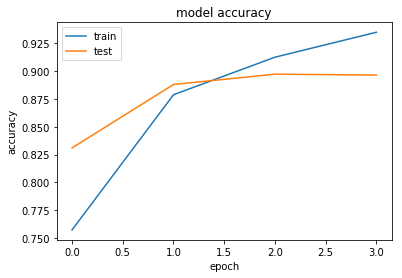

In [113]:
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

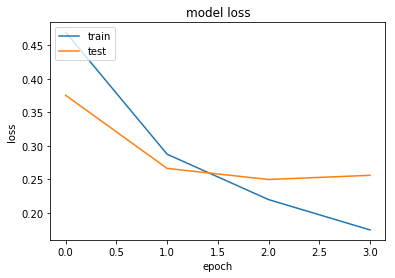

In [114]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### '''Train a recurrent convolutional network on the IMDB sentiment classification task. -> Model D

### Test score: 0.35238
### Test accuracy: 0.85455

In [115]:
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt

In [116]:
# Embedding
max_features = 10000
maxlen = 100
embedding_size = 128

In [117]:
# Convolution
kernel_size = 5
filters = 64
pool_size = 4

In [118]:
# LSTM
lstm_output_size = 70


In [119]:
# Training
batch_size = 30
epochs = 4

In [120]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=max_features,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [121]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


In [122]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)


In [123]:
print('Build model...')

Build model...


In [124]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [125]:
model.compile(loss='binary_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

In [126]:
print('Train...')
history = model.fit(X_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 42s 2ms/step - loss: 0.4212 - acc: 0.8014 - val_loss: 0.3496 - val_acc: 0.8454
Epoch 2/4
25000/25000 [==============================] - 41s 2ms/step - loss: 0.2795 - acc: 0.8830 - val_loss: 0.3229 - val_acc: 0.8581
Epoch 3/4
25000/25000 [==============================] - 41s 2ms/step - loss: 0.2234 - acc: 0.9107 - val_loss: 0.3464 - val_acc: 0.8558
Epoch 4/4
25000/25000 [==============================] - 41s 2ms/step - loss: 0.1774 - acc: 0.9325 - val_loss: 0.3524 - val_acc: 0.8546


In [127]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

25000/25000 [==============================] - 6s 247us/step


In [128]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.3523846116989851
Test accuracy: 0.8545599939346313


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


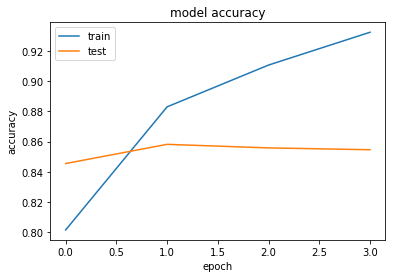

In [129]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

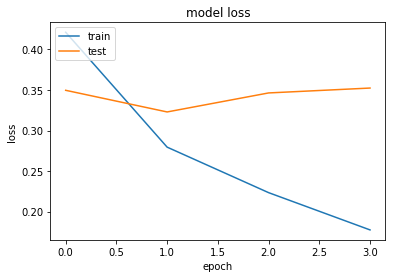

In [130]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Conclusion:: Among Models A, B, C and D, model C(Convolution1D) is giving best results.